In [1]:
import os
os.getcwd()

'C:\\Users\\Sumanth William Laza\\OneDrive\\A_DataScienceProgram\\A_INSOFE\\Z_PHD_1\\Hospital_Readmission_Prediction'

In [2]:
import numpy as np
import pandas as pd

# 1. Preprocessing Libraries
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder    #Dummification for Numerical Attribute

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold #Hyperparameter tuning, StratifiedKFold
# another way to cross-validate


# 2. Algorithm Import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier


# 3. Evaluation Library
from sklearn.metrics import confusion_matrix

# 4. Viz Lib
import matplotlib.pyplot as plt 
import seaborn as sns

# 5. Misc Lib
# !pip install imblearn
from imblearn.over_sampling import SMOTE    #Data/Class imbalance
import random
random.seed(123)
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\Sumanth William Laza\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sumanth William Laza\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sumanth William Laza\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sumanth William Laza\Anaco

### Reading all the three datasets

In [3]:
patient_data = pd.read_csv("Train.csv", header=0, na_values='?' )
hosp_data = pd.read_csv("Train_HospitalizationData.csv",header=0, na_values='?')
treat_data = pd.read_csv("Train_Diagnosis_TreatmentData.csv",header=0, na_values='?')

### Type description

In [4]:
patient_data.head()

,patientID,race,gender,age,weight,readmitted
0,PT11101,Caucasian,Male,[80-90),NaN,NO
1,PT11102,Caucasian,Male,[70-80),NaN,NO
2,PT11103,NaN,Female,[60-70),NaN,NO
3,PT11104,Caucasian,Female,[70-80),NaN,NO
4,PT11105,Caucasian,Female,[60-70),NaN,Within30days


### Shape of datasets

In [5]:
patient_data.shape

(34650, 6)

In [6]:
hosp_data.shape

(34650, 9)

In [7]:
treat_data.shape

(34650, 32)

### Since all the IDs are unique we can right away merge the dataset 

In [8]:
data = pd.merge(patient_data, hosp_data,on=["patientID"])
data = pd.merge(data, treat_data, on=['patientID'])

In [9]:
data.shape

(34650, 45)

In [10]:
data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,num_diagnoses
count,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000
mean,2.081558,3.749986,5.526753,42.649206,1.453131,15.584762,7.122886
std,1.472163,5.459886,4.101795,19.899355,1.759489,8.509216,2.039727
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,31.000000,0.000000,10.000000,5.000000
50%,1.000000,1.000000,7.000000,44.000000,1.000000,14.000000,8.000000
75%,3.000000,3.000000,7.000000,57.000000,2.000000,20.000000,9.000000
max,8.000000,28.000000,25.000000,132.000000,6.000000,81.000000,16.000000


In [11]:
# IDs to be removed
data.drop(labels=['patientID','AdmissionID'], axis=1, inplace=True)

### The merged dataframe

In [12]:
data.dtypes

race                        object
gender                      object
age                         object
weight                      object
readmitted                  object
Admission_date              object
Discharge_date              object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
num_diagnoses                int64
diagnosis_1                 object
diagnosis_2                 object
diagnosis_3                 object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [13]:
data.describe(exclude='int64').iloc[1,:]

race                         5
gender                       2
age                         10
weight                       8
readmitted                   2
Admission_date             912
Discharge_date             925
payer_code                  17
medical_specialty           66
diagnosis_1                663
diagnosis_2                680
diagnosis_3                725
max_glu_serum                4
A1Cresult                    4
metformin                    4
repaglinide                  4
nateglinide                  4
chlorpropamide               4
glimepiride                  4
acetohexamide                1
glipizide                    4
glyburide                    4
tolbutamide                  2
pioglitazone                 4
rosiglitazone                4
acarbose                     3
miglitol                     2
troglitazone                 2
tolazamide                   2
insulin                      4
glyburide.metformin          4
glipizide.metformin          2
metformi

Shape of dataset

In [14]:
data.shape

(34650, 43)

Describe the Dataset

First 20 records of the dataset

All columns of the Dataset

In [15]:
data.columns

Index(['race', 'gender', 'age', 'weight', 'readmitted', 'Admission_date',
       'Discharge_date', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'num_diagnoses', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

Now Creating a list of categorical Attributes

In [16]:
cat_attr = ['race', 'weight', 'age', 'gender', 'readmitted',
        'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty','diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed']

Converting the same to Categorical

In [17]:
data[cat_attr] = data[cat_attr].astype('category')

In [18]:
data.describe(include='object')

,Admission_date,Discharge_date
count,34650,34650
unique,912,925
top,2015-10-07,2015-01-28
freq,56,58


In [19]:
data['weight'].value_counts(dropna=False)

NaN          33592
[75-100)       412
[50-75)        319
[100-125)      215
[125-150)       52
[25-50)         34
[150-175)       11
[0-25)          11
[175-200)        4
Name: weight, dtype: int64

In [20]:
data.dtypes

race                        category
gender                      category
age                         category
weight                      category
readmitted                  category
Admission_date                object
Discharge_date                object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                 category
diagnosis_2                 category
diagnosis_3                 category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
g

### Columns with null values

In [21]:
data.loc[:,((data.isna().sum())>0)].isna().sum()

race                  1079
weight               33592
payer_code           14719
medical_specialty    16394
diagnosis_1              6
diagnosis_2            179
diagnosis_3            681
dtype: int64

### Preprocessing and Feature Engineering

#### 1. High Risk Feature Values (levels)

Creating Risk Labelling for following Level types:


|no.   |Level % of T=1  | Label  | Label Encoding|
|------|:--------------:|-------:|---------------|
| 1.   | 50+            | High Risk    | 3|
| 2.   | 25=<x<50       | Medium Risk  |2| 
| 3.   |  1=<x<25       | Low Risk  | 1|
| 4.   | <1             | No Risk  |0|

In [22]:
cat_feat = [x for x in cat_attr if x != 'readmitted']
kv_1 = dict()
kv_0 = dict()

In [23]:
unique_vals = data['readmitted'].unique()
targets = [data.loc[data['readmitted']==val] for val in unique_vals]

In [24]:
data['readmitted'] = [1 if i == 'Within30days' else 0 for i in data['readmitted']]  #change dtype to numerical
data['readmitted'].value_counts()

0    29891
1     4759
Name: readmitted, dtype: int64

In [25]:
for i, j in zip(cat_feat,cat_feat):
    kv_1[i] = dict(targets[1][i].value_counts())  # Level Value counts in Target=1 pop
    kv_0[j] = dict(targets[0][j].value_counts())   # Level Value counts in Target=0 pop

**Retrieving Feature Levels who posses 50%+ records labelled as *Target=1***

In [26]:
hr_feat_lev = dict()  
hr_count = dict()  
risk_records = 0
for i in kv_1:
    a=[]
    b=0
    for j in kv_1[i]:
        if ((kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])>.50):
            a.append(j)
            risk_records+=(data[data[i]==j].shape[0])
            b+=(data[data[i]==j].shape[0])
        else: continue
    if (len(a)!=0):
        hr_feat_lev[i]=a
    else: continue
    hr_count[i]=b

In [27]:
print('Number of High Risk Records:', risk_records)

Number of High Risk Records: 202


In [28]:
hr_feat_lev  #Risk Level/values

{'discharge_disposition_id': [15],
 'medical_specialty': ['Proctology'],
 'diagnosis_1': ['V58',
  '567',
  '250.43',
  '359',
  '356',
  '526',
  '494',
  '347',
  '391',
  '34',
  '299',
  '262',
  '735',
  '904',
  '906',
  '826',
  '643',
  'V60',
  '146'],
 'diagnosis_2': ['250.43',
  '136',
  '500',
  '260',
  '605',
  '114',
  '258',
  '179',
  '186',
  'E936',
  '826'],
 'diagnosis_3': ['283',
  '711',
  'V60',
  '156',
  '695',
  '913',
  '597',
  '152',
  '365.44',
  '890',
  '602',
  '854',
  '524',
  '989',
  'E817',
  '387',
  '391',
  '49',
  '967',
  '852',
  '158',
  '837',
  'E912',
  '279',
  'E946',
  '744',
  '838',
  '755',
  'E929',
  'E922',
  '750',
  '341']}

In [29]:
hr_count  #Feature(s) Risk Count

{'discharge_disposition_id': 23,
 'medical_specialty': 1,
 'diagnosis_1': 108,
 'diagnosis_2': 24,
 'diagnosis_3': 46}

In [30]:
mr_feat_lev = dict()  #Initializing varaible for Medium Risk Level(s)
mr_count = dict()

# Retrieving 'Medium Risk' Feature-Levels who posses 25%<x=<50% records labelled as Target=1

risk_records = 0
for i in kv_1:
    a=[]
    b=0
    for j in kv_1[i]:
        if ((kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])>.25 and (kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])<=0.5):
            a.append(j)
            risk_records+=(data[data[i]==j].shape[0])
            b+=(data[data[i]==j].shape[0])
        else: continue
    if (len(a)!=0):
        mr_feat_lev[i]=a
    else: continue
    mr_count[i]=b
print('Medium Risk Levels count:', risk_records)

Medium Risk Levels count: 4362


In [31]:
mr_feat_lev

{'weight': ['[0-25)'],
 'discharge_disposition_id': [22, 5, 28, 27, 12],
 'admission_source_id': [20],
 'medical_specialty': ['Oncology',
  'Hematology/Oncology',
  'Cardiology-Pediatric',
  'OutreachServices',
  'Pediatrics-Hematology-Oncology'],
 'diagnosis_1': ['250.7',
  '250.82',
  '707',
  '808',
  '572',
  '250.41',
  '438',
  '443',
  '576',
  '298',
  '191',
  '112',
  '311',
  '42',
  '250.42',
  '447',
  '250.92',
  '719',
  '421',
  '924',
  '512',
  '183',
  '922',
  '293',
  '396',
  '358',
  '239',
  '277',
  '478',
  '794',
  '199',
  '204',
  '718',
  '200',
  '161',
  '473',
  '966',
  '736',
  '250.3',
  '967',
  '581',
  '82',
  '350',
  '263',
  '341',
  '368',
  '48',
  '352',
  '382',
  '508',
  '301',
  '529',
  '454',
  '452',
  '397',
  '445',
  '964',
  '968',
  '806',
  '152',
  '897',
  '250.31',
  '163',
  '171',
  '854',
  '890',
  '871',
  '230',
  '928',
  '933',
  '172',
  '935',
  '570',
  '705',
  '619',
  '646',
  '141',
  '693'],
 'diagnosis_2': ['

In [32]:
mr_count  #Feature-Level with Med Risk Count

{'weight': 11,
 'discharge_disposition_id': 1286,
 'admission_source_id': 57,
 'medical_specialty': 196,
 'diagnosis_1': 1176,
 'diagnosis_2': 680,
 'diagnosis_3': 917,
 'repaglinide': 34,
 'acarbose': 5}

In [33]:
lr_feat_lev = dict()  #Initializing varaible for Low Risk Level(s)
lr_count = dict()

# Retrieving 'Low Risk' Feature-Levels who posses 1%<x=<25% records labelled as Target=1

risk_records = 0
for i in kv_1:
    a=[]
    b=0
    for j in kv_1[i]:
        if ((kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])>0.01 and (kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])<=.25):
            a.append(j)
            risk_records+=(data[data[i]==j].shape[0])
            b+=(data[data[i]==j].shape[0])
        else: continue
    if (len(a)!=0):
        lr_feat_lev[i]=a
    else: continue
    lr_count[i]=b
print('Low Risk Levels count:', risk_records)

Low Risk Levels count: 1172104


In [34]:
lr_count  # Feature-Level with Low Risk count

{'race': 33571,
 'weight': 1047,
 'age': 34650,
 'gender': 34650,
 'admission_type_id': 34634,
 'discharge_disposition_id': 32562,
 'admission_source_id': 34583,
 'payer_code': 19930,
 'medical_specialty': 17852,
 'diagnosis_1': 32405,
 'diagnosis_2': 32752,
 'diagnosis_3': 31941,
 'max_glu_serum': 34650,
 'A1Cresult': 34650,
 'metformin': 34650,
 'repaglinide': 34616,
 'nateglinide': 34637,
 'chlorpropamide': 34648,
 'glimepiride': 34650,
 'acetohexamide': 34650,
 'glipizide': 34650,
 'glyburide': 34650,
 'tolbutamide': 34642,
 'pioglitazone': 34650,
 'rosiglitazone': 34650,
 'acarbose': 34645,
 'miglitol': 34650,
 'troglitazone': 34649,
 'tolazamide': 34650,
 'insulin': 34650,
 'glyburide.metformin': 34644,
 'glipizide.metformin': 34648,
 'metformin.rosiglitazone': 34649,
 'metformin.pioglitazone': 34649,
 'change': 34650,
 'diabetesMed': 34650}

In [35]:
lr_feat_lev

{'race': ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Other', 'Asian'],
 'weight': ['[75-100)',
  '[50-75)',
  '[100-125)',
  '[125-150)',
  '[25-50)',
  '[175-200)',
  '[150-175)'],
 'age': ['[70-80)',
  '[60-70)',
  '[80-90)',
  '[50-60)',
  '[40-50)',
  '[30-40)',
  '[90-100)',
  '[20-30)',
  '[10-20)',
  '[0-10)'],
 'gender': ['Female', 'Male'],
 'admission_type_id': [1, 2, 3, 6, 5, 8, 4],
 'discharge_disposition_id': [1, 3, 6, 18, 2, 4, 25, 7, 23, 14, 13, 8, 24],
 'admission_source_id': [7, 1, 17, 4, 6, 2, 5, 3, 9, 8],
 'payer_code': ['MC',
  'HM',
  'SP',
  'BC',
  'UN',
  'MD',
  'CP',
  'CM',
  'OG',
  'PO',
  'DM',
  'CH',
  'WC',
  'OT',
  'MP',
  'SI'],
 'medical_specialty': ['InternalMedicine',
  'Family/GeneralPractice',
  'Emergency/Trauma',
  'Cardiology',
  'Surgery-General',
  'Orthopedics',
  'Nephrology',
  'Orthopedics-Reconstructive',
  'Psychiatry',
  'Pulmonology',
  'Radiologist',
  'Gastroenterology',
  'Surgery-Vascular',
  'Urology',
  'Surgery-Cardiovascula

In [36]:
nr_feat_lev = dict()  #Initializing varaible for No Risk Level(s)
nr_count = dict()

# Retrieving 'No Risk' Feature-Levels who posses x=<1% records labelled as Target=1

risk_records = 0
for i in kv_1:
    a=[]
    b=0
    for j in kv_1[i]:
        if ((kv_1[i][j])/(kv_1[i][j]+kv_0[i][j])<=0.01):
            a.append(j)
            risk_records+=(data[data[i]==j].shape[0])
            b+=(data[data[i]==j].shape[0])
        else: continue
    if (len(a)!=0):
        nr_feat_lev[i]=a
    else: continue
    nr_count[i]=b
print('No Levels count:', risk_records)

No Levels count: 4082


In [37]:
nr_count #Feature-Levels with No Risk count

{'admission_type_id': 16,
 'discharge_disposition_id': 779,
 'admission_source_id': 10,
 'payer_code': 1,
 'medical_specialty': 207,
 'diagnosis_1': 955,
 'diagnosis_2': 1015,
 'diagnosis_3': 1065,
 'nateglinide': 13,
 'chlorpropamide': 2,
 'tolbutamide': 8,
 'troglitazone': 1,
 'glyburide.metformin': 6,
 'glipizide.metformin': 2,
 'metformin.rosiglitazone': 1,
 'metformin.pioglitazone': 1}

In [38]:
nr_feat_lev

{'admission_type_id': [7],
 'discharge_disposition_id': [11, 10, 9, 16, 17, 19, 20],
 'admission_source_id': [22, 10, 11, 13, 14, 25],
 'payer_code': ['FR'],
 'medical_specialty': ['Endocrinology-Metabolism',
  'PhysicianNotFound',
  'Psychiatry-Addictive',
  'Perinatology',
  'Pediatrics-Pulmonology',
  'DCPTEAM',
  'Dentistry',
  'Pediatrics-Neurology',
  'Surgery-Maxillofacial',
  'Surgery-Pediatric',
  'Gynecology',
  'Pediatrics-Endocrinology',
  'Surgery-Colon&Rectal',
  'Pediatrics-EmergencyMedicine',
  'Pediatrics-CriticalCare',
  'SurgicalSpecialty',
  'Speech',
  'Neurophysiology',
  'AllergyandImmunology'],
 'diagnosis_1': ['335',
  '11',
  '175',
  '143',
  '142',
  '344',
  '180',
  '184',
  '179',
  '149',
  '336',
  '160',
  '173',
  '355',
  '117',
  '342',
  '337',
  '136',
  '338',
  '156',
  '135',
  '35',
  '147',
  '110',
  '170',
  '164',
  '115',
  '133',
  '353',
  '229',
  '187',
  '252',
  '245',
  '246',
  '250.21',
  '31',
  '250.5',
  '250.51',
  '250.53',


In [39]:
#Risk Label Encoding: 
# Initialing with Risk levels and Values

In [40]:
nr_vals = dict()
for i,j in zip(nr_feat_lev, range(len(nr_feat_lev.keys()))):
    nr_vals[j] = data[i].apply(lambda x: 0 if x!=x else 1 if x in set(nr_feat_lev[i]) else 0)
nr_df = pd.DataFrame(nr_vals)
nr_vals_max = nr_df.apply(np.max, axis=1)
nr_vals_sum = nr_df.apply(np.nansum, axis=1)   # np.nansum() sums over np.nan (treats= 0)
print(nr_vals_max.describe(),'\n')
print(nr_vals_sum.value_counts())

count    34650.000000
mean         0.104127
std          0.305430
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64 

0.0    31042
1.0     3185
2.0      373
3.0       49
4.0        1
dtype: int64


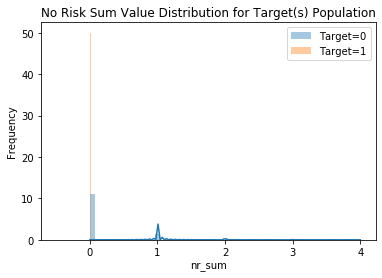

              count      mean       std  min  25%  50%  75%  max
readmitted                                                      
0           29891.0  0.136563  0.391297  0.0  0.0  0.0  0.0  4.0
1            4759.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0 

readmitted  nr_sum
0           0.0       26283
            1.0        3185
            2.0         373
            3.0          49
            4.0           1
1           0.0        4759
Name: nr_sum, dtype: int64


In [41]:
#list of sliced dataframes
sample_df = pd.DataFrame({'nr_sum':nr_vals_sum,'readmitted':data['readmitted'].values})
unique_vals = sample_df['readmitted'].unique()
targets = [sample_df.loc[sample_df['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['nr_sum'], label='Target=0')
sns.distplot(targets[1]['nr_sum'], label='Target=1')
dist_plot.set(xlabel='nr_sum', ylabel='Frequency')
plt.legend()
plt.title('No Risk Sum Value Distribution for Target(s) Population')
plt.show()
print(sample_df.groupby('readmitted')['nr_sum'].describe(),'\n')
print(sample_df.groupby('readmitted')['nr_sum'].value_counts())

**NOTE:** No Risk Sum portrays an Inverse relation between the No Risk sum value(s) and chance of falling in Target=1 population;

No Risk Sum is excluded from our Risk calculation below.

In [42]:
lr_count.keys()

dict_keys(['race', 'weight', 'age', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone', 'metformin.pioglitazone', 'change', 'diabetesMed'])

In [43]:
lr_feat_lev

{'race': ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Other', 'Asian'],
 'weight': ['[75-100)',
  '[50-75)',
  '[100-125)',
  '[125-150)',
  '[25-50)',
  '[175-200)',
  '[150-175)'],
 'age': ['[70-80)',
  '[60-70)',
  '[80-90)',
  '[50-60)',
  '[40-50)',
  '[30-40)',
  '[90-100)',
  '[20-30)',
  '[10-20)',
  '[0-10)'],
 'gender': ['Female', 'Male'],
 'admission_type_id': [1, 2, 3, 6, 5, 8, 4],
 'discharge_disposition_id': [1, 3, 6, 18, 2, 4, 25, 7, 23, 14, 13, 8, 24],
 'admission_source_id': [7, 1, 17, 4, 6, 2, 5, 3, 9, 8],
 'payer_code': ['MC',
  'HM',
  'SP',
  'BC',
  'UN',
  'MD',
  'CP',
  'CM',
  'OG',
  'PO',
  'DM',
  'CH',
  'WC',
  'OT',
  'MP',
  'SI'],
 'medical_specialty': ['InternalMedicine',
  'Family/GeneralPractice',
  'Emergency/Trauma',
  'Cardiology',
  'Surgery-General',
  'Orthopedics',
  'Nephrology',
  'Orthopedics-Reconstructive',
  'Psychiatry',
  'Pulmonology',
  'Radiologist',
  'Gastroenterology',
  'Surgery-Vascular',
  'Urology',
  'Surgery-Cardiovascula

In [44]:
lr_vals = dict()
for i,j in zip(lr_feat_lev, range(len(lr_feat_lev.keys()))):
    lr_vals[j] = data[i].apply(lambda x: 0 if x!=x else 1 if x in set(lr_feat_lev[i]) else 0)
lr_df = pd.DataFrame(lr_vals)
lr_vals_max = lr_df.apply(np.max, axis=1)
lr_vals_sum = lr_df.apply(np.nansum, axis=1)   # np.nansum() sums over np.nan (treats= 0)
print(lr_vals_max.describe(),'\n')
print(lr_vals_sum.value_counts())

count    34650.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64 

34.0    16074
33.0     8714
35.0     7218
32.0     1951
31.0      358
36.0      303
30.0       30
29.0        2
dtype: int64


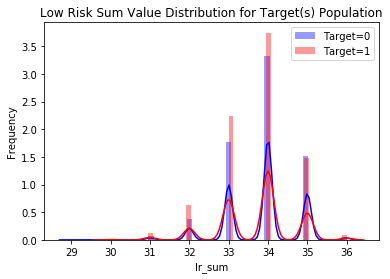

              count       mean       std   min   25%   50%   75%   max
readmitted                                                            
0           29891.0  33.843197  0.883855  29.0  33.0  34.0  34.0  36.0
1            4759.0  33.724942  0.945660  30.0  33.0  34.0  34.0  36.0 

readmitted  lr_sum
0           34.0      13935
            33.0       7436
            35.0       6372
            32.0       1594
            31.0        283
            36.0        250
            30.0         19
            29.0          2
1           34.0       2139
            33.0       1278
            35.0        846
            32.0        357
            31.0         75
            36.0         53
            30.0         11
Name: lr_sum, dtype: int64


In [45]:
#list of sliced dataframes
sample_df = pd.DataFrame({'lr_sum':lr_vals_sum,'readmitted':data['readmitted'].values})
unique_vals = sample_df['readmitted'].unique()
targets = [sample_df.loc[sample_df['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['lr_sum'], label='Target=0',color='b')
sns.distplot(targets[1]['lr_sum'], label='Target=1', color='r')
dist_plot.set(xlabel='lr_sum', ylabel='Frequency')
plt.legend()
plt.title('Low Risk Sum Value Distribution for Target(s) Population')
plt.show()
print(sample_df.groupby('readmitted')['lr_sum'].describe(), '\n')
print(sample_df.groupby('readmitted')['lr_sum'].value_counts())

**NOTE:** Low Risk sum of sample(s) is chosen to be excluded from Risk Calculation due to fairly uniform distribution between the two Target classes.

In [46]:
print(data.shape)
print(lr_vals_max.shape)

(34650, 43)
(34650,)


In [47]:
lr_vals_max.describe()

count    34650.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

In [48]:
lr_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,NaN,1,1,1,1,1,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1,1.0,NaN,1,1,1,1,1,1.0,NaN,1.0,...,1,1,1,1,1,1,1,1,1,1
2,NaN,NaN,1,1,1,1,1,1.0,1.0,1.0,...,1,1,1,1,0,1,1,1,1,1
3,1.0,NaN,1,1,1,1,1,1.0,NaN,1.0,...,1,1,1,1,1,1,1,1,1,1
4,1.0,NaN,1,1,1,1,1,1.0,NaN,1.0,...,1,1,1,1,1,1,1,1,1,1
5,1.0,NaN,1,1,1,1,1,NaN,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
6,1.0,NaN,1,1,1,1,1,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
7,1.0,NaN,1,1,1,1,1,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
8,1.0,NaN,1,1,1,1,1,1.0,NaN,1.0,...,1,1,1,1,1,1,1,1,1,1
9,1.0,NaN,1,1,1,1,1,1.0,NaN,1.0,...,1,1,1,1,1,1,1,1,1,1


In [49]:
data.shape

(34650, 43)

In [50]:
mr_vals = dict()
for i,j in zip(mr_feat_lev, range(len(mr_feat_lev.keys()))):
    mr_vals[j] = data[i].apply(lambda x: 0 if x!=x else 2 if x in set(mr_feat_lev[i]) else 0)
mr_df = pd.DataFrame(mr_vals)
mr_vals_max = mr_df.apply(np.max, axis=1)
mr_vals_sum = mr_df.apply(np.nansum, axis=1)
print(mr_vals_max.value_counts(),'\n')
print(mr_vals_sum.value_counts())

0.0    30730
2.0     3920
dtype: int64 

0.0    30730
2.0     3511
4.0      376
6.0       33
dtype: int64


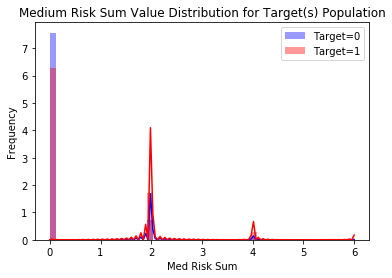

readmitted  mr_sum
0           0.0       27136
            2.0        2531
            4.0         215
            6.0           9
1           0.0        3594
            2.0         980
            4.0         161
            6.0          24
Name: mr_sum, dtype: int64 

              count      mean       std  min  25%  50%  75%  max
readmitted                                                      
0           29891.0  0.199926  0.651663  0.0  0.0  0.0  0.0  6.0
1            4759.0  0.577432  1.101531  0.0  0.0  0.0  0.0  6.0


In [51]:
#list of sliced dataframes
sample_df = pd.DataFrame({'mr_sum':mr_vals_sum,'readmitted':data['readmitted'].values})
unique_vals = sample_df['readmitted'].unique()
targets = [sample_df.loc[sample_df['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['mr_sum'], label='Target=0', color='b')
sns.distplot(targets[1]['mr_sum'], label='Target=1', color='r')
dist_plot.set(xlabel='Med Risk Sum', ylabel='Frequency')
plt.legend()
plt.title('Medium Risk Sum Value Distribution for Target(s) Population')
plt.show()
print(sample_df.groupby('readmitted')['mr_sum'].value_counts(),'\n')
print(sample_df.groupby('readmitted')['mr_sum'].describe())

**NOTE** Medium Risk sum is included in Risk Calculation, clear divergence between population is noticed

In [52]:
hr_vals = dict()
for i,j in zip(hr_feat_lev, range(len(hr_feat_lev.keys()))):
    hr_vals[j] = data[i].apply(lambda x: 0 if x!=x else 3 if x in set(hr_feat_lev[i]) else 0)
hr_df = pd.DataFrame(hr_vals)
hr_vals_max = hr_df.apply(np.max, axis=1)
hr_vals_sum = hr_df.apply(np.nansum, axis=1)
print(hr_vals_max.value_counts(),'\n')
print(hr_vals_sum.value_counts())

0.0    34452
3.0      198
dtype: int64 

0.0    34452
3.0      194
6.0        4
dtype: int64


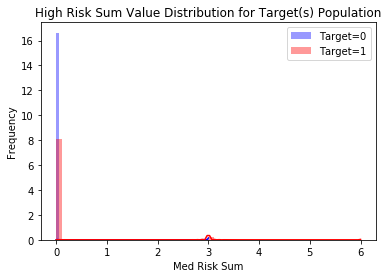

readmitted  hr_sum
0           0.0       29830
            3.0          61
1           0.0        4622
            3.0         133
            6.0           4
Name: hr_sum, dtype: int64 

              count      mean       std  min  25%  50%  75%  max
readmitted                                                      
0           29891.0  0.006122  0.135388  0.0  0.0  0.0  0.0  3.0
1            4759.0  0.088884  0.523392  0.0  0.0  0.0  0.0  6.0


In [53]:
#list of sliced dataframes
sample_df = pd.DataFrame({'hr_sum':hr_vals_sum,'readmitted':data['readmitted'].values})
unique_vals = sample_df['readmitted'].unique()
targets = [sample_df.loc[sample_df['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['hr_sum'], label='Target=0', color='b')
sns.distplot(targets[1]['hr_sum'], label='Target=1', color='r')
dist_plot.set(xlabel='Med Risk Sum', ylabel='Frequency')
plt.legend()
plt.title('High Risk Sum Value Distribution for Target(s) Population')
plt.show()
print(sample_df.groupby('readmitted')['hr_sum'].value_counts(),'\n')
print(sample_df.groupby('readmitted')['hr_sum'].describe())

**NOTE:** High Risk sum of sample(s) is included in the Risk calculation below, clear divergence between the population.

In [54]:
data[cat_feat].isna().sum()

race                         1079
weight                      33592
age                             0
gender                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  14719
medical_specialty           16394
diagnosis_1                     6
diagnosis_2                   179
diagnosis_3                   681
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin       

In [90]:
# Aggregating Risk Level(s)
#Risk Relative = Sum of Nums
#Risk Max = Max Risk Num
#Risk Label = Max Risk Label

risk_max = pd.DataFrame(data={2:mr_vals_sum, 3:hr_vals_sum}).apply(max,axis=1)
print('Risk_Max Value Counts: \n', risk_max.value_counts(),'\n')
risk_rel = pd.DataFrame(data={2:mr_vals_sum, 3:hr_vals_sum}).apply(np.nansum,axis=1)
print('Risk_Relative Value Counts: \n', risk_rel.value_counts(),'\n')

Risk_Max Value Counts: 
 0.0    30599
2.0     3456
4.0      376
3.0      182
6.0       37
dtype: int64 

Risk_Relative Value Counts: 
 0.0    30599
2.0     3456
4.0      366
3.0      128
5.0       54
6.0       34
7.0       10
9.0        2
8.0        1
dtype: int64 



In [91]:
data['Risk_Max'] = risk_max
data['Risk_Relative'] = risk_rel
data.describe()

,readmitted,num_lab_procedures,num_procedures,num_medications,num_diagnoses,Risk_Relative,Risk_Label,Days_in_Hospital,age_num,Risk_Max
count,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000
mean,0.137345,42.649206,1.453131,15.584762,7.122886,0.269264,0.116912,4.221934,65.263203,0.265051
std,0.344216,19.899355,1.759489,8.509216,2.039727,0.789732,0.321320,2.925797,16.318321,0.766852
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,0.000000,31.000000,0.000000,10.000000,5.000000,0.000000,0.000000,2.000000,55.000000,0.000000
50%,0.000000,44.000000,1.000000,14.000000,8.000000,0.000000,0.000000,3.000000,65.000000,0.000000
75%,0.000000,57.000000,2.000000,20.000000,9.000000,0.000000,0.000000,6.000000,75.000000,0.000000
max,1.000000,132.000000,6.000000,81.000000,16.000000,9.000000,1.000000,14.000000,95.000000,6.000000


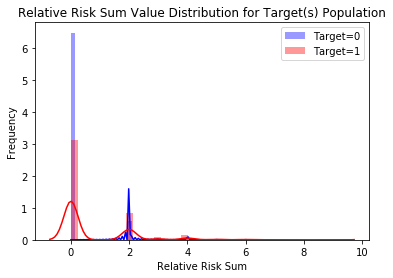

readmitted  Risk_Relative
0           0.0              27092
            2.0               2517
            4.0                212
            3.0                 44
            5.0                 14
            6.0                  9
            7.0                  3
1           0.0               3507
            2.0                939
            4.0                154
            3.0                 84
            5.0                 40
            6.0                 25
            7.0                  7
            9.0                  2
            8.0                  1
Name: Risk_Relative, dtype: int64 

              count      mean       std  min  25%  50%  75%  max
readmitted                                                      
0           29891.0  0.206049  0.669758  0.0  0.0  0.0  0.0  7.0
1            4759.0  0.666316  1.241373  0.0  0.0  0.0  2.0  9.0


In [92]:
#list of sliced dataframes
unique_vals = data['readmitted'].unique()
targets = [data.loc[data['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['Risk_Relative'], label='Target=0', color='b')
sns.distplot(targets[1]['Risk_Relative'], label='Target=1', color='r')
dist_plot.set(xlabel='Relative Risk Sum', ylabel='Frequency')
plt.legend()
plt.title('Relative Risk Sum Value Distribution for Target(s) Population')
plt.show()
print(data.groupby('readmitted')['Risk_Relative'].value_counts(),'\n')
print(data.groupby('readmitted')['Risk_Relative'].describe())

**NOTE:** Even though the bulk of T=1 samples have Risk_Relative=0, Distribution of Risk Values between two populations diverges at Higher Values (>=2)

#### Risk Label Encoding based on Risk_Relative:

New Rule:
1. Risk_Relative = 0  |  Risk_Label = 0
2. Risk_Relative >= 2  | Risk_Label = 1

In [93]:
data['Risk_Label'] = data['Risk_Relative'].apply((lambda x: 0 if x==0 else 1))
# data['Risk_Label']=data['Risk_Label'].astype('category')
print(data.groupby('readmitted')['Risk_Label'].value_counts())

readmitted  Risk_Label
0           0             27092
            1              2799
1           0              3507
            1              1252
Name: Risk_Label, dtype: int64


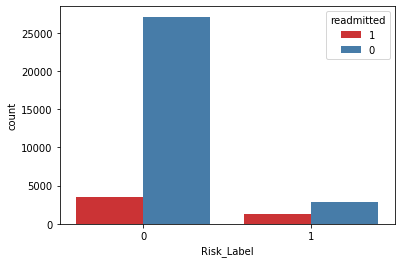

In [94]:
ct_plot = sns.countplot(x='Risk_Label', data=data, hue='readmitted', hue_order=[1,0],palette='Set1')
plt.show()
# train_data.Order_Source.value_counts()

In [95]:
#T=1 samples are half of T=0 population beyond Risk_Relative>1
data[data['Risk_Relative']>1]['readmitted'].value_counts()

0    2799
1    1252
Name: readmitted, dtype: int64

Mean and Standard Deviation of **Risk_Relative** in the Target population(s) has noticable difference: 

Target-0: Mean = 0.206049, Std =  0.669758

Target-1: Mean = 0.666316 , Std = 1.241373

In [96]:
data.drop('Risk_Max', axis=1,inplace=True)  #Information gained from 'Risk_Relative'
data['Risk_Relative'] = data['Risk_Relative'].astype('int64')

In [100]:
d_cat = list(data.describe(include='category').columns)
for i in d_cat:
    print((data.groupby('readmitted')[i].value_counts()), '\n')
    print((data.groupby('readmitted')[i].value_counts(normalize=True)), '\n')

readmitted  race           
0           Caucasian          21913
            AfricanAmerican     5508
            Hispanic             693
            Other                556
            Asian                244
1           Caucasian           3649
            AfricanAmerican      826
            Hispanic              93
            Other                 62
            Asian                 27
Name: race, dtype: int64 

readmitted  race           
0           Caucasian          0.757868
            AfricanAmerican    0.190496
            Hispanic           0.023968
            Other              0.019229
            Asian              0.008439
1           Caucasian          0.783552
            AfricanAmerican    0.177367
            Hispanic           0.019970
            Other              0.013313
            Asian              0.005798
Name: race, dtype: float64 

readmitted  gender
0           Female    15679
            Male      14212
1           Female     2543
            Mal

Name: admission_source_id, dtype: float64 

readmitted  payer_code
0           MC            8285
            HM            1773
            BC            1718
            SP            1405
            MD             979
            CP             916
            UN             884
            CM             602
            OG             289
            PO             237
            DM             151
            CH              65
            WC              61
            OT              24
            SI              19
            MP              16
            FR               1
1           MC            1436
            HM             210
            SP             198
            BC             152
            UN             116
            MD             115
            CP              98
            CM              73
            OG              42
            PO              25
            DM              23
            CH               7
            WC               5
   

readmitted  diagnosis_1
0           414            0.075183
            786            0.044501
            428            0.044300
            410            0.042861
            486            0.032857
            715            0.028474
            427            0.028374
            434            0.021514
            682            0.020979
            780            0.019875
            38             0.015960
            491            0.015659
            276            0.015157
            250.8          0.014254
            996            0.013852
            599            0.013116
            574            0.012112
            584            0.012112
            722            0.011142
            820            0.010874
            435            0.010439
            562            0.009971
            518            0.009804
            577            0.009737
            296            0.009569
            433            0.008967
            560            0.008499
    

Name: max_glu_serum, dtype: int64 

readmitted  max_glu_serum
0           None             0.955137
            Norm             0.023619
            >200             0.012679
            >300             0.008564
1           None             0.947468
            Norm             0.025215
            >200             0.014709
            >300             0.012608
Name: max_glu_serum, dtype: float64 

readmitted  A1Cresult
0           None         24309
            >8            2650
            Norm          1709
            >7            1223
1           None          3933
            >8             392
            Norm           239
            >7             195
Name: A1Cresult, dtype: int64 

readmitted  A1Cresult
0           None         0.813255
            >8           0.088655
            Norm         0.057174
            >7           0.040915
1           None         0.826434
            >8           0.082370
            Norm         0.050221
            >7           0.040975


Name: insulin, dtype: float64 

readmitted  glyburide.metformin
0           No                     29706
            Steady                   179
            Up                         5
            Down                       1
1           No                      4728
            Steady                    31
Name: glyburide.metformin, dtype: int64 

readmitted  glyburide.metformin
0           No                     0.993811
            Steady                 0.005988
            Up                     0.000167
            Down                   0.000033
1           No                     0.993486
            Steady                 0.006514
Name: glyburide.metformin, dtype: float64 

readmitted  glipizide.metformin
0           No                     29889
            Steady                     2
1           No                      4759
Name: glipizide.metformin, dtype: int64 

readmitted  glipizide.metformin
0           No                     0.999933
            Steady                 

In [109]:
df = data.describe(include='category').T
df[df['top']=='No'].index

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'payer_code', 'medical_specialty', 'diagnosis_1',
       'diagnosis_2', 'diagnosis_3', 'max_glu_serum', 'A1Cresult',
       'diabetesMed', 'Year', 'Month'],
      dtype='object')

In [108]:
df = data.describe(include='category').T
df[df['top']!='No']

# Drop Cat Attr = ['max_glu_serum','']

,count,unique,top,freq
race,33571,5,Caucasian,25562
gender,34650,2,Female,18222
admission_type_id,34650,8,1,17583
discharge_disposition_id,34650,26,1,21287
admission_source_id,34650,17,7,17937
payer_code,19931,17,MC,9721
medical_specialty,18256,66,InternalMedicine,5347
diagnosis_1,34644,663,414,2544
diagnosis_2,34471,680,250,2655
diagnosis_3,33969,725,250,4682


In [114]:
drop_attr = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change','max_glu_serum', 'A1Cresult','Year','Month']
data_0 = data.copy()
for i in drop_attr:
    data.drop(i, axis=1, inplace=True)


In [130]:
data.groupby(['insulin','diabetesMed'])['readmitted'].value_counts()

insulin  diabetesMed  readmitted
Down     Yes          0             2904
                      1              580
No       No           0             7891
                      1              930
         Yes          0             7145
                      1             1202
Steady   Yes          0             9233
                      1             1554
Up       Yes          0             2718
                      1              493
Name: readmitted, dtype: int64

#### 2. Date Time processing

In [131]:
import datetime

In [132]:
data.Discharge_date = pd.to_datetime(data.Discharge_date, infer_datetime_format=True)
data.Admission_date = pd.to_datetime(data.Admission_date, infer_datetime_format=True)

AttributeError: 'DataFrame' object has no attribute 'Discharge_date'

In [ ]:
data['Days_in_Hospital'] = (data.Discharge_date - data.Admission_date).dt.days

In [ ]:
data.dtypes

In [ ]:
data.head()

In [133]:
data.dtypes

race                        category
gender                      category
readmitted                     int64
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                 category
diagnosis_2                 category
diagnosis_3                 category
insulin                     category
diabetesMed                 category
Risk_Relative                  int64
Risk_Label                     int64
Days_in_Hospital               int64
age_num                        int64
dtype: object

In [71]:
# #Time Stamping
data['Admission_date'] = pd.to_datetime(data['Admission_date'], infer_datetime_format=True)
data['Discharge_date'] = pd.to_datetime(data['Discharge_date'], infer_datetime_format=True)

# Extracting DT info
data['Year'] = data['Admission_date'].dt.year

In [72]:
data.head()

,race,gender,age,weight,readmitted,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,admission_source_id,...,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Risk_Relative,Risk_Label,Days_in_Hospital,Year
0,Caucasian,Male,[80-90),NaN,0,2015-07-18,2015-07-23,2,1,7,...,No,No,No,No,Ch,Yes,0,0,5,2015
1,Caucasian,Male,[70-80),NaN,0,2016-04-23,2016-04-29,1,3,7,...,No,No,No,No,No,Yes,0,0,6,2016
2,NaN,Female,[60-70),NaN,0,2016-05-13,2016-05-17,2,1,1,...,Up,No,No,No,Ch,Yes,0,0,4,2016
3,Caucasian,Female,[70-80),NaN,0,2015-06-16,2015-06-18,1,1,7,...,No,No,No,No,No,Yes,0,0,2,2015
4,Caucasian,Female,[60-70),NaN,1,2016-03-08,2016-03-09,1,1,7,...,No,No,No,No,No,Yes,0,0,1,2016


In [73]:
import datetime as dt
from datetime import datetime

def get_month(x):
    return dt.datetime.strftime(x, format = '%b')

data['Month'] = data.loc[:,'Admission_date'].apply(get_month)
data['Month'] = data['Month'].astype('category')

In [74]:
data

,race,gender,age,weight,readmitted,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,admission_source_id,...,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Risk_Relative,Risk_Label,Days_in_Hospital,Year,Month
0,Caucasian,Male,[80-90),NaN,0,2015-07-18,2015-07-23,2,1,7,...,No,No,No,Ch,Yes,0,0,5,2015,Jul
1,Caucasian,Male,[70-80),NaN,0,2016-04-23,2016-04-29,1,3,7,...,No,No,No,No,Yes,0,0,6,2016,Apr
2,NaN,Female,[60-70),NaN,0,2016-05-13,2016-05-17,2,1,1,...,No,No,No,Ch,Yes,0,0,4,2016,May
3,Caucasian,Female,[70-80),NaN,0,2015-06-16,2015-06-18,1,1,7,...,No,No,No,No,Yes,0,0,2,2015,Jun
4,Caucasian,Female,[60-70),NaN,1,2016-03-08,2016-03-09,1,1,7,...,No,No,No,No,Yes,0,0,1,2016,Mar
5,AfricanAmerican,Male,[40-50),NaN,0,2016-05-21,2016-05-22,1,1,7,...,No,No,No,Ch,Yes,0,0,1,2016,May
6,AfricanAmerican,Female,[40-50),NaN,0,2015-06-08,2015-06-14,1,1,7,...,No,No,No,Ch,Yes,0,0,6,2015,Jun
7,Caucasian,Female,[70-80),NaN,0,2015-03-20,2015-03-23,5,3,17,...,No,No,No,Ch,Yes,0,0,3,2015,Mar
8,Caucasian,Female,[70-80),NaN,0,2015-03-29,2015-04-06,1,1,7,...,No,No,No,Ch,Yes,0,0,8,2015,Mar
9,Caucasian,Female,[90-100),NaN,0,2015-05-04,2015-05-07,1,3,1,...,No,No,No,Ch,Yes,0,0,3,2015,May


Text(0.5, 1.0, 'Hospitalization Period for Target(s) Population')

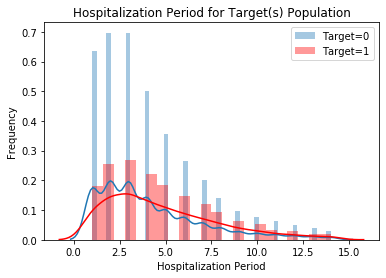

In [75]:
unique_vals = data['readmitted'].unique()
#list of sliced dataframes
targets = [data.loc[data['readmitted']==val] for val in unique_vals]

dist_plot = sns.distplot(targets[0]['Days_in_Hospital'], label='Target=0')
sns.distplot(targets[1]['Days_in_Hospital'], label='Target=1',color='r')
dist_plot.set(xlabel='Hospitalization Period', ylabel='Frequency')
plt.legend()
plt.title('Hospitalization Period for Target(s) Population')

In [76]:
data[['Days_in_Hospital', 'readmitted']].groupby('readmitted').describe()

Days_in_Hospital                                              
                      count      mean       std  min  25%  50%  75%   max
readmitted                                                               
0                   29891.0  4.128333  2.893445  1.0  2.0  3.0  6.0  14.0
1                    4759.0  4.809834  3.056801  1.0  2.0  4.0  7.0  14.0

In [77]:
data[data['Days_in_Hospital']>=4].groupby('readmitted')['Days_in_Hospital'].value_counts()

readmitted  Days_in_Hospital
0           4                   3896
            5                   2759
            6                   2059
            7                   1570
            8                   1106
            9                    744
            10                   596
            11                   488
            12                   383
            13                   306
            14                   232
1           4                    621
            5                    519
            6                    416
            7                    340
            8                    259
            9                    180
            10                   145
            11                    96
            12                    81
            14                    59
            13                    55
Name: Days_in_Hospital, dtype: int64

**Highlight:** The median stay for Target=1 patients is 1 day more than other patients.

#### 3. Age of Patients (Numerical value)

In [78]:
data['age'].head()

0    [80-90)
1    [70-80)
2    [60-70)
3    [70-80)
4    [60-70)
Name: age, dtype: category
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]

In [79]:
import statistics
import re

def age_num(x):
    num = re.findall('\d+', x)  #search and return digit character(s)
    num = [int(x) for x in num]
#     return num
    return (statistics.mean(num))

In [80]:
data['age_num'] = data.loc[:,'age'].apply(age_num)
data

,race,gender,age,weight,readmitted,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,admission_source_id,...,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Risk_Relative,Risk_Label,Days_in_Hospital,Year,Month,age_num
0,Caucasian,Male,[80-90),NaN,0,2015-07-18,2015-07-23,2,1,7,...,No,No,Ch,Yes,0,0,5,2015,Jul,85
1,Caucasian,Male,[70-80),NaN,0,2016-04-23,2016-04-29,1,3,7,...,No,No,No,Yes,0,0,6,2016,Apr,75
2,NaN,Female,[60-70),NaN,0,2016-05-13,2016-05-17,2,1,1,...,No,No,Ch,Yes,0,0,4,2016,May,65
3,Caucasian,Female,[70-80),NaN,0,2015-06-16,2015-06-18,1,1,7,...,No,No,No,Yes,0,0,2,2015,Jun,75
4,Caucasian,Female,[60-70),NaN,1,2016-03-08,2016-03-09,1,1,7,...,No,No,No,Yes,0,0,1,2016,Mar,65
5,AfricanAmerican,Male,[40-50),NaN,0,2016-05-21,2016-05-22,1,1,7,...,No,No,Ch,Yes,0,0,1,2016,May,45
6,AfricanAmerican,Female,[40-50),NaN,0,2015-06-08,2015-06-14,1,1,7,...,No,No,Ch,Yes,0,0,6,2015,Jun,45
7,Caucasian,Female,[70-80),NaN,0,2015-03-20,2015-03-23,5,3,17,...,No,No,Ch,Yes,0,0,3,2015,Mar,75
8,Caucasian,Female,[70-80),NaN,0,2015-03-29,2015-04-06,1,1,7,...,No,No,Ch,Yes,0,0,8,2015,Mar,75
9,Caucasian,Female,[90-100),NaN,0,2015-05-04,2015-05-07,1,3,1,...,No,No,Ch,Yes,0,0,3,2015,May,95


In [81]:
data['age_num'] = data['age_num'].astype('int64')

Text(0.5, 1.0, 'Age Distribution of Target(s) Population(s)')

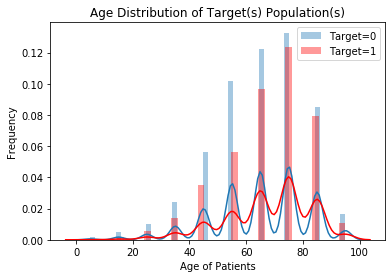

In [82]:
unique_vals = data['readmitted'].unique()
targets = [data[data['readmitted']==val] for val in unique_vals]
dist_plot = sns.distplot(targets[0]['age_num'], label='Target=0')
sns.distplot(targets[1]['age_num'], label='Target=1', color='r')
dist_plot.set(xlabel='Age of Patients', ylabel='Frequency')
plt.legend()
plt.title('Age Distribution of Target(s) Population(s)')

In [83]:
data[['age_num', 'readmitted']].groupby('readmitted').describe()

age_num                                                   
              count       mean        std  min   25%   50%   75%   max
readmitted                                                            
0           29891.0  64.863504  16.474118  5.0  55.0  65.0  75.0  95.0
1            4759.0  67.773692  15.064575  5.0  55.0  75.0  75.0  95.0

#### 3. Dropping of ID's and other Redundant Features from Dataframe:

In [84]:
data.describe(exclude=['object', 'category'])

,readmitted,Admission_date,Discharge_date,num_lab_procedures,num_procedures,num_medications,num_diagnoses,Risk_Relative,Risk_Label,Days_in_Hospital,Year,age_num
count,34650.000000,34650,34650,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000
unique,NaN,912,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-10-07 00:00:00,2015-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,56,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2014-01-01 00:00:00,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-30 00:00:00,2016-07-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.137345,NaN,NaN,42.649206,1.453131,15.584762,7.122886,0.269264,0.116912,4.221934,2014.801039,65.263203
std,0.344216,NaN,NaN,19.899355,1.759489,8.509216,2.039727,0.789732,0.321320,2.925797,0.747384,16.318321
min,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2014.000000,5.000000
25%,0.000000,NaN,NaN,31.000000,0.000000,10.000000,5.000000,0.000000,0.000000,2.000000,2014.000000,55.000000


In [85]:
#Drop Feat = ['Admission_dat','Discharge_date', 'age']
#dtype category = 'Year'
data.drop(labels=['Admission_date','Discharge_date', 'age'], axis=1, inplace=True)
data['Year'] = data['Year'].astype('category')

In [86]:
data.dtypes

race                        category
gender                      category
weight                      category
readmitted                     int64
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                 category
diagnosis_2                 category
diagnosis_3                 category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
p

In [87]:
data.describe(exclude='int64')

,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diagnosis_1,diagnosis_2,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,Year,Month
count,33571,34650,1058,34650,34650,34650,19931,18256,34644,34471,...,34650,34650,34650,34650,34650,34650,34650,34650,34650,34650
unique,5,2,8,8,26,17,17,66,663,680,...,2,4,4,2,2,2,2,2,3,12
top,Caucasian,Female,[75-100),1,1,7,MC,InternalMedicine,414,250,...,No,No,No,No,No,No,No,Yes,2015,Mar
freq,25562,18222,412,17583,21287,17937,9721,5347,2544,2655,...,34635,17168,34434,34648,34649,34649,19531,25829,13924,3612


In [134]:
data.isna().describe().T
#['weight']

,count,unique,top,freq
race,34650,2,False,33571
gender,34650,1,False,34650
readmitted,34650,1,False,34650
admission_type_id,34650,1,False,34650
discharge_disposition_id,34650,1,False,34650
admission_source_id,34650,1,False,34650
payer_code,34650,2,False,19931
medical_specialty,34650,2,False,18256
num_lab_procedures,34650,1,False,34650
num_procedures,34650,1,False,34650


In [89]:
data.drop('weight', axis=1, inplace=True)  #Majority of NA values
data.columns  # weight dropped

Index(['race', 'gender', 'readmitted', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'num_diagnoses', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'metformin.rosiglitazone', 'metformin.pioglitazone', 'change',
       'diabetesMed', 'Risk_Relative', 'Risk_Label', 'Days_in_Hospital',
       'Year', 'Month', 'age_num'],
      dtype='object')

### Modelling (Phase - A) 
- Motivation: Vanilla Modelling to procure benchmark statistics, Ideal Model Family 
- Run all Classifiers in a pipeline and gridsearch

In [135]:
len(data.columns)

21

In [136]:
data.dtypes

race                        category
gender                      category
readmitted                     int64
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
diagnosis_1                 category
diagnosis_2                 category
diagnosis_3                 category
insulin                     category
diabetesMed                 category
Risk_Relative                  int64
Risk_Label                     int64
Days_in_Hospital               int64
age_num                        int64
dtype: object

In [137]:
data.columns

Index(['race', 'gender', 'readmitted', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'num_diagnoses', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'insulin', 'diabetesMed', 'Risk_Relative', 'Risk_Label',
       'Days_in_Hospital', 'age_num'],
      dtype='object')

In [138]:
num_attr = list(data.describe(include='int64').columns)
num_attr.remove('readmitted')
print(num_attr)

['num_lab_procedures', 'num_procedures', 'num_medications', 'num_diagnoses', 'Risk_Relative', 'Risk_Label', 'Days_in_Hospital', 'age_num']


In [139]:
cat_attr = list(data.describe(include='category').columns)
print(cat_attr)

['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3', 'insulin', 'diabetesMed']


In [140]:
X_data = data[num_attr+cat_attr]
print('X_data\n',X_data.describe(),'\n')

y_data = data['readmitted']
print('y_data\n',y_data.describe())

X_data
        num_lab_procedures  num_procedures  num_medications  num_diagnoses  \
count        34650.000000    34650.000000     34650.000000   34650.000000   
mean            42.649206        1.453131        15.584762       7.122886   
std             19.899355        1.759489         8.509216       2.039727   
min              1.000000        0.000000         1.000000       1.000000   
25%             31.000000        0.000000        10.000000       5.000000   
50%             44.000000        1.000000        14.000000       8.000000   
75%             57.000000        2.000000        20.000000       9.000000   
max            132.000000        6.000000        81.000000      16.000000   

       Risk_Relative    Risk_Label  Days_in_Hospital       age_num  
count   34650.000000  34650.000000      34650.000000  34650.000000  
mean        0.269264      0.116912          4.221934     65.263203  
std         0.789732      0.321320          2.925797     16.318321  
min         0.000000  

In [141]:
print(X_data.shape)
print(y_data.shape)

(34650, 20)
(34650,)


In [142]:
# Cat Label Drop = ['AdmissionID','patientID ']
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.2, stratify=y_data, random_state=123)
print(X_train.shape)
print(X_val.shape,'\n')
print(y_train.value_counts(),'\n')
print(y_val.value_counts())

(27720, 20)
(6930, 20) 

0    23913
1     3807
Name: readmitted, dtype: int64 

0    5978
1     952
Name: readmitted, dtype: int64


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

- Imputation of Missing Values

- Numerical Attributes : using Mean/Median value
- Categorical Attributes : using Mode or 'most_frequent'

In [144]:
#Checkpoint saving of Dataframe
X_train_a = X_train.copy()
X_val_a = X_val.copy()

In [145]:
print(X_train[num_attr].isna().sum())
print('\n------------------------------------------------\n')
print(X_val[num_attr].isna().sum())

#NOTE: No NaN in num_attr

num_lab_procedures    0
num_procedures        0
num_medications       0
num_diagnoses         0
Risk_Relative         0
Risk_Label            0
Days_in_Hospital      0
age_num               0
dtype: int64

------------------------------------------------

num_lab_procedures    0
num_procedures        0
num_medications       0
num_diagnoses         0
Risk_Relative         0
Risk_Label            0
Days_in_Hospital      0
age_num               0
dtype: int64


In [146]:
#Use this code for Median Imputation on num_attr

# # Num Attr Imputation
# si = SimpleImputer(strategy='median')
# si.fit(X_train[num_attr])
# X_train[num_attr] = si.transform(X_train[num_attr])
# X_val[num_attr] = si.transform(X_val[num_attr])
# print(X_train.isna().sum())
# print('\n------------------------------------------\n')
# print(X_val.isna().sum())

In [147]:
print(X_train[cat_attr].isna().sum())
print('\n-----------------------------------------------\n')
print(X_val[cat_attr].isna().sum())


race                          873
gender                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  11766
medical_specialty           13066
diagnosis_1                     4
diagnosis_2                   139
diagnosis_3                   530
insulin                         0
diabetesMed                     0
dtype: int64

-----------------------------------------------

race                         206
gender                         0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
payer_code                  2953
medical_specialty           3328
diagnosis_1                    2
diagnosis_2                   40
diagnosis_3                  151
insulin                        0
diabetesMed                    0
dtype: int64


In [148]:
# Cat Attr Imputation
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')   #argument values: strategy={'most_frequent', 'mean', 'median', 'constant'}
si.fit(X=X_train[cat_attr])
X_train[cat_attr]=si.transform(X_train[cat_attr])
X_val[cat_attr]=si.transform(X_val[cat_attr])

print(X_train[cat_attr].isna().sum())
print('------------------------------------------------------------------')
print(X_val[cat_attr].isna().sum())

race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
payer_code                  0
medical_specialty           0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 0
insulin                     0
diabetesMed                 0
dtype: int64
------------------------------------------------------------------
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
payer_code                  0
medical_specialty           0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 0
insulin                     0
diabetesMed                 0
dtype: int64


In [149]:
#NOTE: after Imputation, category dtypes become objects, conversion required

X_train[cat_attr]=X_train[cat_attr].astype('category')
X_val[cat_attr]=X_val[cat_attr].astype('category')

-- Standardize the Numerical Attr

In [150]:
sc = StandardScaler()
sc = sc.fit(X=X_train[num_attr])
X_train[num_attr] = sc.transform(X_train[num_attr])
X_val[num_attr] = sc.transform(X_val[num_attr])
print('X_train:\n', X_train[num_attr].describe(),'\n')
print('\n----++---------++---------++---------++---------++---------++---------++-----\n')
print('X_val:\n',X_val[num_attr].describe())

X_train:
        num_lab_procedures  num_procedures  num_medications  num_diagnoses  \
count        2.772000e+04    2.772000e+04     2.772000e+04   2.772000e+04   
mean         2.381372e-16    8.969096e-17    -4.349375e-16  -2.747041e-16   
std          1.000018e+00    1.000018e+00     1.000018e+00   1.000018e+00   
min         -2.085239e+00   -8.256111e-01    -1.715923e+00  -3.004228e+00   
25%         -6.326111e-01   -8.256111e-01    -6.595535e-01  -1.042526e+00   
50%          6.865778e-02   -2.567902e-01    -1.900559e-01   4.287508e-01   
75%          7.198360e-01    3.120307e-01     5.141904e-01   9.191764e-01   
max          4.476633e+00    2.587314e+00     7.674028e+00   4.352155e+00   

       Risk_Relative    Risk_Label  Days_in_Hospital       age_num  
count   2.772000e+04  2.772000e+04      2.772000e+04  2.772000e+04  
mean    4.803557e-17 -2.571536e-16     -9.012271e-16 -3.185138e-16  
std     1.000018e+00  1.000018e+00      1.000018e+00  1.000018e+00  
min    -3.415757e-01

- Get Dummies of Categorical Variables:

#### Selecting a subset of Categorical Variable for Model Test Run:
- Compare unique value(s) in all features, select based on given threshold


In [151]:
#No. of Unique Levels in Cat Attr
X_train.describe(include='category').iloc[1,:]

race                          5
gender                        2
admission_type_id             8
discharge_disposition_id     26
admission_source_id          16
payer_code                   17
medical_specialty            64
diagnosis_1                 637
diagnosis_2                 650
diagnosis_3                 684
insulin                       4
diabetesMed                   2
Name: unique, dtype: object

- Feature Engineering of Categorical Variables
- Improving Recall

In [153]:
# X_train = pd.concat(objs=[X_train,y_train], axis=1)
# X_val = pd.concat(objs=[X_val,y_val], axis=1)

print(X_train.shape,'\n')
print(X_val.shape)

(27720, 20) 

(6930, 20)


List of ICD Codes


|no.   |Level % of T=1  | Label  | Label Encoding|
|------|:--------------:|-------:|---------------|
| 1.   | 001–139 |infectious and parasitic diseases |**A**|
| 2.   | 140–239        | neoplasms    |**B**| 
| 3.   |  240–279          | endocrine, nutritional and metabolic diseases, and immunity disorders  | **C**|
| 4.   | 280–289                | diseases of the blood and blood-forming organs  |**D**|
| 5.   | 290–319 | mental disorders                |**E**|
| 6.   | 320–389                | diseases of the nervous system and sense organs  |**F**|
| 7.   | 390–459 | diseases of the circulatory system                 |**G**|
| 8.   | 460–519                | diseases of the respiratory system  |**H**|
| 9.   | 520–579               | diseases of the digestive system |**I**|
|10.   | 580–629                | diseases of the genitourinary system  |**J**|
| 11.   | 630–679                | complications of pregnancy, childbirth, and the puerperium  |**K**|
| 12.   | 680–709                | diseases of the skin and subcutaneous tissue|**L**|
| 13.   | 710–739:               | diseases of the musculoskeletal system and connective tissue|**M**|
| 14.   | 740–759                | congenital anomalies  |**N**|
| 15.   | 760–779                |  certain conditions originating in the perinatal period|**O**|
| 16.   | 780–799                | symptoms, signs, and ill-defined conditions|**P**|
| 17.   | 800–999                | injury and poisoning|**Q**|
| 18.   | E&V                | external causes of injury and supplemental classification|**E&V**|

In [154]:
X_train.isna().sum()

num_lab_procedures          0
num_procedures              0
num_medications             0
num_diagnoses               0
Risk_Relative               0
Risk_Label                  0
Days_in_Hospital            0
age_num                     0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
payer_code                  0
medical_specialty           0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 0
insulin                     0
diabetesMed                 0
dtype: int64

In [155]:
# Binning diagnosis codes to ICD_9 Format

def ev_code_fn(x):
    try:
        if float(x)>=1 and float(x)<=139: return 'A'
        elif float(x)>=140 and float(x)<=239: return 'B'
        elif float(x)>=240 and float(x)<=279: return 'C'
        elif float(x)>=280 and float(x)<=289: return 'D'
        elif float(x)>=290 and float(x)<=319: return 'E'
        elif float(x)>=320 and float(x)<=389: return 'F'
        elif float(x)>=390 and float(x)<=459: return 'G'
        elif float(x)>=460 and float(x)<=519: return 'H'
        elif float(x)>=520 and float(x)<=579: return 'I'
        elif float(x)>=580 and float(x)<=629: return 'J'
        elif float(x)>=630 and float(x)<=679: return 'K'
        elif float(x)>=680 and float(x)<=709: return 'L'
        elif float(x)>=710 and float(x)<=739: return 'M'
        elif float(x)>=740 and float(x)<=759: return 'N'
        elif float(x)>=760 and float(x)<=779: return 'O'
        elif float(x)>=780 and float(x)<=799: return 'P'
        elif float(x)>=800 and float(x)<=999: return 'Q'
        else: return 'Z'
    except ValueError:
        if str(x)[0]=='E' or str(x)[0]=='V': return 'E&V'
        else: return 'Z'
        
            
X_train['diagnosis_1_CLASS'] = X_train['diagnosis_1'].apply(ev_code_fn)
X_train['diagnosis_2_CLASS'] = X_train['diagnosis_2'].apply(ev_code_fn)
X_train['diagnosis_3_CLASS'] = X_train['diagnosis_3'].apply(ev_code_fn)

X_val['diagnosis_1_CLASS'] = X_val['diagnosis_1'].apply(ev_code_fn)
X_val['diagnosis_2_CLASS'] = X_val['diagnosis_2'].apply(ev_code_fn)
X_val['diagnosis_3_CLASS'] = X_val['diagnosis_3'].apply(ev_code_fn)

# master_icd = re.findall('(^E|^V)', master_icd)
# master_icd

In [156]:
X_train.drop(['diagnosis_1', 'diagnosis_2','diagnosis_3'], axis=1,inplace=True)
X_val.drop(['diagnosis_1', 'diagnosis_2','diagnosis_3'], axis=1,inplace=True)

In [160]:
X_train.describe(include='object').columns

Index(['diagnosis_1_CLASS', 'diagnosis_2_CLASS', 'diagnosis_3_CLASS'], dtype='object')

In [162]:
cat_list = list(X_train.describe(include='object').columns)
for i in cat_list:
    X_train[i] = X_train[i].astype('category')
    X_val[i] = X_val[i].astype('category')

X_train.dtypes

num_lab_procedures           float64
num_procedures               float64
num_medications              float64
num_diagnoses                float64
Risk_Relative                float64
Risk_Label                   float64
Days_in_Hospital             float64
age_num                      float64
race                        category
gender                      category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
insulin                     category
diabetesMed                 category
diagnosis_1_CLASS           category
diagnosis_2_CLASS           category
diagnosis_3_CLASS           category
dtype: object

In [166]:
cat_attr = list(X_train.describe(include='category').columns)
list_1 = list(X_train[cat_attr].columns[X_train.describe(include='category').iloc[1,:]>=16])
print(list_1)
# cat_attr = list(X_train.columns[X_train.describe(include='category').iloc[1,:]>16])

['discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diagnosis_1_CLASS', 'diagnosis_2_CLASS', 'diagnosis_3_CLASS']


In [175]:
num_attr = list(X_train.describe(include='float64').columns)
num_attr

['num_lab_procedures',
 'num_procedures',
 'num_medications',
 'num_diagnoses',
 'Risk_Relative',
 'Risk_Label',
 'Days_in_Hospital',
 'age_num']

#### Vanilla Model - 0

In [168]:
# X_train_1 = X_train.copy()
# X_val_1 = X_val.copy()

In [176]:
X_train = X_train_1.copy()
X_val = X_val_1.copy()

In [178]:
# X_val = pd.get_dummies(X_val[cat_attr] ,drop_first=True)
# #Concatenate Numerical Features to Categorical Features
X_train = pd.concat(objs=[X_train[num_attr], pd.get_dummies(X_train[cat_attr] ,drop_first=True)],axis=1)
X_val = pd.concat(objs=[X_val[num_attr], pd.get_dummies(X_val[cat_attr] ,drop_first=True)],axis=1)
X_train, X_val = X_train.align(X_val, join='inner', axis=1)  #Can use inner join too

In [179]:
print(X_train.shape)
print(X_val.shape)

(27720, 191)
(6930, 191)


In [180]:
# Combine ``DataFrame`` objects horizontally along the x axis by
# passing in ``axis=1``.

# >>> df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
# ...                    columns=['animal', 'name'])
# >>> pd.concat([df1, df4], axis=1)
#   letter  number  animal    name
# 0      a       1    bird   polly
# 1      b       2  monkey  george

- Run all Classifiers in a Pipeline and Gridsearch

In [181]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [190]:
names = [
        "Nearest Neighbors",
#          "Linear SVM",
#          "Gaussian Process",
#          "Decision Tree", 
#          "Random Forest",
#          "Neural Net",
         "AdaBoost",
#          "Naive Bayes",
#          "QDA" 
        ]

classifiers=[
    KNeighborsClassifier(30),
# LinearSVC(C=0.025),
# GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True, n_jobs=-1),
# DecisionTreeClassifier(max_depth=5),
# RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1),
# MLPClassifier(alpha=1),
AdaBoostClassifier(n_estimators=10, random_state=123),
# GaussianNB(),
# QuadraticDiscriminantAnalysis()
]
        

In [191]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [192]:
# roc_auc_score( ) vs auc( ) score 

# The first [.9, .1] in y_pred denotes 90% probability that the first sample has label 0. The log loss is non-negative.
# clf.predict_proba(X_val)[:,1]

In [193]:
for name, clf in zip(names, classifiers):
    print(name) 
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    y_score = clf.predict_proba(X_val)[:,1]
    print('Score:', accuracy_score(y_val, y_pred))
    print('Recall:', recall_score(y_val, y_pred))
    print('Precision:', precision_score(y_val, y_pred))
    print('F1:', f1_score(y_val, y_pred))
    print('ROC-AUC:', roc_auc_score(y_val, y_score),'\n')

Nearest Neighbors
Score: 0.8626262626262626
Recall: 0.0
Precision: 0.0
F1: 0.0
ROC-AUC: 0.4585185947915466 

AdaBoost
Score: 0.8626262626262626
Recall: 0.0
Precision: 0.0
F1: 0.0
ROC-AUC: 0.6055674026050701 



In [196]:
X_train_1.to_csv('X_train_1.csv',index=False)
X_val_1.to_csv('X_val_1.csv',index=False)

Best Accuracy : Neural Net
Best Recall : Nearest Neighbours

In [369]:
X_train['discharge_disposition_id']

5354      1
11840     3
3764      1
29627     1
20244     3
34631    14
22276     1
24558    25
13488     6
12828     6
11087     1
29445    22
1075      6
7364      1
20710     1
13496     1
6950      1
9772      6
7591      1
33923     1
7883      3
892       1
11570     1
28860     1
25401     3
28399     1
32978     1
6712      6
689       1
8619      6
         ..
30227     6
1977      1
36        6
21715     1
9109      1
22125     6
29575    25
23698     1
31869     1
10611    25
27869     1
685       6
24555     6
28510     1
15688     1
6932      1
31084     6
7744     18
16452     1
21006     1
18832     1
9255      6
34611     1
7748      3
7934      1
19677     1
29188     1
14013     1
14809    22
8351      1
Name: discharge_disposition_id, Length: 27720, dtype: int64

In [364]:
# Object to category dtype

for i in list(X_train.describe(include='object').columns):
    X_train[i]=X_train[i].astype('category')
    X_val[i]=X_val[i].astype('category')
X_train.dtypes

num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
num_diagnoses                  int64
Risk_Relative                  int64
Risk_Label                     int64
Days_in_Hospital               int64
age_num                        int64
race                        category
gender                      category
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id            int64
payer_code                  category
medical_specialty           category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
r

In [371]:
X_train[['admission_type_id', 'discharge_disposition_id','admission_source_id']] = X_train[['admission_type_id', 'discharge_disposition_id','admission_source_id']].astype('category')
X_val[['admission_type_id', 'discharge_disposition_id','admission_source_id']] = X_val[['admission_type_id', 'discharge_disposition_id','admission_source_id']].astype('category')

In [372]:
cat_attr=list(X_train.describe(include='category').columns)

In [373]:
#Cat Attr having Levels >= 16
cat_lev_high = list(X_train[cat_attr].columns[X_train.describe(include='category').iloc[1,:]>=16])
cat_lev_high

['discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diagnosis_1_CLASS',
 'diagnosis_2_CLASS',
 'diagnosis_3_CLASS']

In [374]:
for i in cat_lev_high:
    print((X_train.groupby('readmitted')[i].value_counts()), '\n')
    print((X_train.groupby('readmitted')[i].value_counts(normalize=True)), '\n')

readmitted  discharge_disposition_id
0           1                           15133
            3                            2725
            6                            2459
            18                            899
            11                            620
            2                             456
            22                            387
            5                             268
            25                            262
            4                             182
            7                             131
            13                            125
            14                            103
            23                             88
            8                              23
            28                             21
            24                             10
            15                              8
            9                               4
            17                              3
            16                             

Name: medical_specialty, Length: 109, dtype: float64 

readmitted  diagnosis_1_CLASS
0           G                    7033
            C                    2518
            I                    2167
            H                    2134
            P                    1897
            Q                    1665
            M                    1494
            J                    1167
            B                    1028
            A                     631
            L                     603
            E                     536
            F                     318
            E&V                   261
            K                     261
            D                     186
            N                      14
1           G                    1215
            C                     400
            H                     344
            I                     314
            Q                     291
            M                     219
            J                     205
   

In [313]:
d_1 = data['diagnosis_1']
d_2 = data['diagnosis_2']
d_3 = data['diagnosis_3']

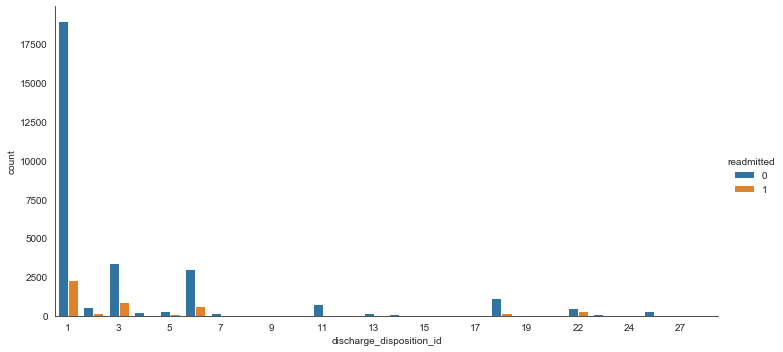

In [293]:
with sns.axes_style('white'):
    g = sns.factorplot("discharge_disposition_id", data=data, aspect=2,
                       kind="count",hue='readmitted')
    
    g.set_xticklabels(step=2)
    plt.show()

In [381]:
#Creating Majority & Minority Level(s) among aggregated levels: 1 = Majority, 0 = Minority
# cat_feat_classes = dict()
# for i in cat_lev_high:

X_train['discharge_disposition_id_LEV'] = X_train['discharge_disposition_id'].apply(lambda x: 1 if int(x) in [1,3,6,22,18,2,5] else 0)
X_train['admission_source_id_LEV'] = X_train['admission_source_id'].apply(lambda x: 1 if int(x) in [7,1,17,4,6,2] else 0)
X_train['payer_code_LEV'] = X_train['payer_code'].apply(lambda x: 1 if str(x) in ['MC','HM','BC','SP','MD','CP','UN','CM','OG'] else 0)
                                                                                                  
X_train['medical_specialty_LEV'] = X_train['medical_specialty'].apply(lambda x: 1 if str(x) in ['InternalMedicine','Family/GeneralPractice','Emergency/Trauma','Cardiology','Surgery-General','Orthopedics','Nephrology','Orthopedics-Reconstructive','Psychiatry','Pulmonology'] else 0)
X_train['diagnosis_1_LEV'] = X_train['diagnosis_1_CLASS'].apply(lambda x: 1 if str(x) in ['C','H','I','Q','M','J','P','B'] else 0)
X_train['diagnosis_2_LEV'] = X_train['diagnosis_2_CLASS'].apply(lambda x: 1 if str(x) in ['G','C','H','J','P','I','L','B','Q'] else 0)
X_train['diagnosis_3_LEV'] = X_train['diagnosis_3_CLASS'].apply(lambda x: 1 if str(x) in ['G','C','H','J','P','E&V','I','E','L'] else 0)

In [382]:
X_val['discharge_disposition_id_LEV'] = X_val['discharge_disposition_id'].apply(lambda x: 1 if int(x) in [1,3,6,22,18,2,5] else 0)
X_val['admission_source_id_LEV'] = X_val['admission_source_id'].apply(lambda x: 1 if int(x) in [7,1,17,4,6,2] else 0)
X_val['payer_code_LEV'] = X_val['payer_code'].apply(lambda x: 1 if str(x) in ['MC','HM','BC','SP','MD','CP',
                                                                                                  'UN','CM','OG'] else 0)
X_val['medical_specialty_LEV'] = X_val['medical_specialty'].apply(lambda x: 1 if str(x) in ['InternalMedicine','Family/GeneralPractice','Emergency/Trauma','Cardiology','Surgery-General','Orthopedics','Nephrology','Orthopedics-Reconstructive','Psychiatry','Pulmonology'] else 0)
X_val['diagnosis_1_LEV'] = X_val['diagnosis_1_CLASS'].apply(lambda x: 1 if str(x) in ['C','H','I','Q','M','J','P','B'] else 0)
X_val['diagnosis_2_LEV'] = X_val['diagnosis_2_CLASS'].apply(lambda x: 1 if str(x) in ['G','C','H','J','P','I','L','B','Q'] else 0)
X_val['diagnosis_3_LEV'] = X_val['diagnosis_3_CLASS'].apply(lambda x: 1 if str(x) in ['G','C','H','J','P','E&V','I','E','L'] else 0)


In [385]:
X_train.drop(labels=['discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diagnosis_1_CLASS',
 'diagnosis_2_CLASS',
 'diagnosis_3_CLASS'], axis=1,inplace=True)

In [386]:
X_val.drop(labels=['discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'diagnosis_1_CLASS',
 'diagnosis_2_CLASS',
 'diagnosis_3_CLASS'], axis=1,inplace=True)

In [390]:
X_train.drop('readmitted',axis=1,inplace=True)
X_val.drop('readmitted',axis=1,inplace=True)

In [395]:
cat_list_2 = list(X_train.describe(include='category').columns)

In [396]:
X_train = pd.get_dummies(X_train[cat_list_2] ,drop_first=True)
X_val = pd.get_dummies(X_val[cat_list_2] ,drop_first=True)

X_train, X_val = X_train.align(X_val, join='inner', axis=1)  #Can use inner join too

In [399]:
X_train.shape

(27720, 65)

In [392]:
names = [
        "Nearest Neighbors",
#          "Linear SVM",
#          "Gaussian Process",
         "Decision Tree", 
         "Random Forest",
         "Neural Net",
         "AdaBoost",
         "Naive Bayes",
         "QDA" 
        ]

classifiers=[
    KNeighborsClassifier(3),
# LinearSVC(C=0.025),
# GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True, n_jobs=-1),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1),
MLPClassifier(alpha=1),
AdaBoostClassifier(),
GaussianNB(),
QuadraticDiscriminantAnalysis()
]
        

In [400]:
for name, clf in zip(names, classifiers):
    print(name) 
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    y_score = clf.predict_proba(X_val)[:,1]
    print('Score:', accuracy_score(y_val, y_pred))
    print('Recall:', recall_score(y_val, y_pred))
    print('Precision:', precision_score(y_val, y_pred))
    print('F1:', f1_score(y_val, y_pred))
    print('ROC-AUC:', roc_auc_score(y_val, y_score),'\n')

Nearest Neighbors
Score: 0.8236652236652237
Recall: 0.06302521008403361
Precision: 0.15384615384615385
F1: 0.08941877794336811
ROC-AUC: 0.5029903061927347 

Decision Tree
Score: 0.8627705627705627
Recall: 0.0021008403361344537
Precision: 0.6666666666666666
F1: 0.00418848167539267
ROC-AUC: 0.5562545861435909 

Random Forest
Score: 0.8626262626262626
Recall: 0.0
Precision: 0.0
F1: 0.0
ROC-AUC: 0.5474969847423746 

Neural Net
Score: 0.8626262626262626
Recall: 0.0
Precision: 0.0
F1: 0.0
ROC-AUC: 0.5516775796969842 

AdaBoost
Score: 0.8626262626262626
Recall: 0.0
Precision: 0.0
F1: 0.0
ROC-AUC: 0.5550477802362161 

Naive Bayes
Score: 0.14935064935064934
Recall: 0.9863445378151261
Precision: 0.13766309925230905
F1: 0.24160555769972983
ROC-AUC: 0.5439865641807073 

QDA
Score: 0.15079365079365079
Recall: 0.9800420168067226
Precision: 0.137226062656273
F1: 0.24074312991872016
ROC-AUC: 0.4985622176270977 



In [401]:
# 5. Misc Lib
# !pip install imblearn
from imblearn.over_sampling import SMOTE    #Data/Class imbalance
import random
random.seed(123)
import warnings
warnings.filterwarnings('ignore')

In [410]:
from sklearn.pipeline import Pipeline    #NEW!
# X_train_pp = np.array(X_train)
# X_val_pp = np.array(X_val)
# X_train_pp.shape

In [405]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
os_data_X, os_data_y = smote.fit_sample(X=X_train_pp, y=y_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Clean Transactions in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Fraud Transactions",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Clean Transactions data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Fraud Transactions in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  47826
Number of Clean Transactions in oversampled data 23913
Number of Fraud Transactions 23913
Proportion of Clean Transactions data in oversampled data is  0.5
Proportion of Fraud Transactions in oversampled data is  0.5


In [411]:
clf_dt = Pipeline(steps=[('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid_bal = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid_bal.fit(os_data_X,os_data_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,
   

In [412]:
dt_grid_bal.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 12,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 20}

In [418]:
print("Conf Matrix : \n", confusion_matrix(y_true=y_val, y_pred =dt_grid_bal.predict(X_val)))
print("\nTrain DATA ACCURACY",accuracy_score(y_true=y_val, y_pred = dt_grid_bal.predict(X_val)))
print("\nTrain DATA Precision", precision_score(y_true=y_val, y_pred = dt_grid_bal.predict(X_val)))
print("\nTrain DATA Recall", recall_score(y_true=y_val, y_pred = dt_grid_bal.predict(X_val)))
print("\nTrain data f1-score for class '1'",f1_score(y_true=y_val, y_pred = dt_grid_bal.predict(X_val),pos_label=1))
print("\nTraom data f1-score for class '0'",f1_score(y_true=y_val, y_pred = dt_grid_bal.predict(X_val),pos_label=0))

Conf Matrix : 
 [[5978    0]
 [ 952    0]]

Train DATA ACCURACY 0.8626262626262626

Train DATA Precision 0.0

Train DATA Recall 0.0

Train data f1-score for class '1' 0.0

Traom data f1-score for class '0' 0.9262472885032538


In [421]:
X_val['Risk_Relative']

KeyError: 'Risk_Relative'